In [170]:
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics

In [171]:
data = open("imudata.txt","r")
pitch_angles = []
time_stamps = []
for line in data:
    split_line = line.split()
    pitch_angles.append(int(split_line[4]))
    time_stamps.append(split_line[1])

n = len(pitch_angles)
x_array = np.arange(n)

values_per_second = []
unique_time_values = list(set(time_stamps))
for utv in unique_time_values:
    values_per_second.append(time_stamps.count(utv))

values_per_second.sort(reverse=True)
values_per_second.pop()
values_per_second.pop()
average_values_per_second = int(sum(values_per_second)/len(values_per_second))
sample_rate = 1/average_values_per_second



In [173]:
def moving_average_function(window_size):
    moving_average = []
    x_average = []
    
    if window_size%2 == 0:
        q = int(window_size/2)
        s = q-1
        f = len(pitch_angles)-q
        for i in range(s,f):
            b = i-(q-1)
            e = b+(window_size-1)
            window = pitch_angles[b:e+1]
            moving_average.append(sum(window)/window_size)
            x_average.append(x_array[i])
    else:
        s = math.floor(window_size/2)
        f = len(pitch_angles)- s
        for i in range(s,f):
            b = i-s
            e = b+(window_size-1)
            window = pitch_angles[b:e+1]
            moving_average.append(sum(window)/window_size)
            x_average.append(x_array[i])
    
    mean = statistics.mean(moving_average)
    stdev = statistics.stdev(moving_average)
    return x_average, moving_average, mean, stdev
        



    
    
    
    
    
    


In [174]:
def plot(w_size):
    x,y,m,std = moving_average_function(w_size)
    plt.plot(x_array,pitch_angles,'r',x,y,'b')
    plt.title("Pitch Angles with Moving Average")
    plt.xlabel("Time [increments of ~"+str(sample_rate)+" s]")
    plt.ylabel("Pitch Angle [deg]")
    plt.figlegend(["original data", "moving average"],loc="upper right")
    
    textstr = "window size: "+str(w_size)+"\nMean: "+str(round(m,2))+"\nStandard Deviation: "+str(round(std,2))
    plt.gca().text(0.75, 0.85, textstr, transform=plt.gca().transAxes, 
                   fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="lightgrey", alpha=0.5))
    plt.show()
    

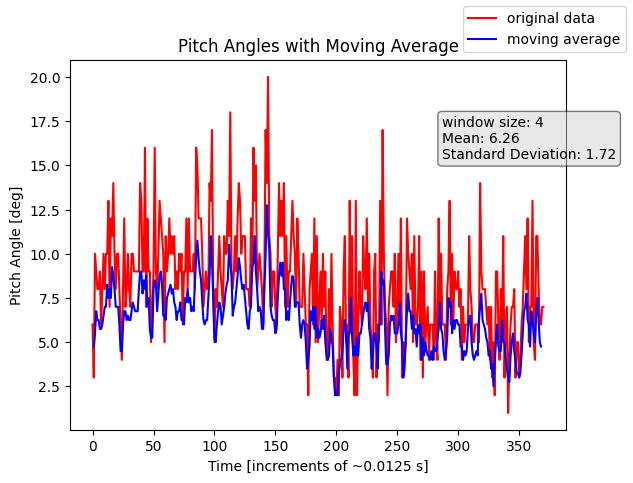

In [180]:
plot(4)